### Rain Prediction in Australia
#### Overview:
Australia, characterized by its susceptibility to notably fluctuating weather patterns, encounters a diverse spectrum of climatic conditions. This variability is the result of a multitude of factors, including geographical location, minimum and maximum temperatures, rainfall, evaporation, sunshine, wind gust direction, wind gust speed, and numerous other contributors.

#### Objective:
The weather data is sourced from various locations across Australia, with this project's primary goal being the prediction of rainfall in regions of the country susceptible to extreme climate fluctuations, thereby enabling our business clients to make well-informed decisions within the specified area.

Rainfall prediction is a supervised machine learning problem, specifically a classification problem. Our methodology includes initiating data cleaning and processing, followed by the application of diverse classification algorithms. Our final goal is to identify the optimal model for predicting next day's rainfall. Subsequently, we plan to employ the most suitable classification model on the training data and assess its performance on the testing data using a range of evaluation metrics.

#### Installing python packages

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import joblib
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

Current Working Directory: C:\Users\yashu\Downloads


###### Importing data 

In [2]:
df = pd.read_csv('weatherAUS_1.csv')
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#### Data structure


In [3]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Observation:**
- The `Date` column should be converted to datetime datatype

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


**Observations:**
- Multiple columns have clear outliers (e.g., the max `Rainfall` value is 371.0 despite the 75th percentile being 0.8)
- Not seeing any values that are immediate cause for concern (such as a negative value for minimum `Rainfall`)

In order to get a better feel for the data and catch any placeholder values that may not have shown up in the summary statistics, I also want to check the top five most frequent values for each column.

#### Column Definitions
As per Australian Bureau of Meteorology, the meaning and units for each of the columns in the dataset are as follows:


| **Column Name** | **Definition** | **Units** |
| --------------- | -------------- | --------- |
| `Date` | Date of the observation | N/A |
| `Location` | Location of the weather station | N/A |
| `MinTemp` | Minimum temperature in the 24 hours to 9am. Sometimes only known to the nearest whole degree | Degrees Celsius |
| `MaxTemp` | Maximum temperature in the 24 hours to 9am. Sometimes only known to the nearest whole degree | Degrees Celsius |
| `Rainfall` | Precipitation (rainfall) in the 24 hours to 9am. Sometimes only known to the nearest whole millimeter | Millimeters |
| `Evaporation` | "Class A" pan evaporation in the 24 hours to 9am | Millimeters |
| `Sunshine` | Bright sunshine in the 24 hours to midnight | Hours |
| `WindGustDir` | Direction of the strongest wind gust in the 24 hours to midnight | 16 compass points |
| `WindGustSpeed` | Speed of the strongest wind gust in the 24 hours to midnight | Kilometers per hour |
| `WindDir9am` | Direction of the wind at 9am | 16 compass points |
| `WindDir3pm` | Direction of the wind at 3pm | 16 compass points |
| `WindSpeed9am` | Speed of the wind at 9am | Kilometers per hour |
| `WindSpeed3pm` | Speed of the wind at 3pm | Kilometers per hour |
| `Humidity9am` | Relative humidity at 9am | Percent |
| `Humidity3pm` | Relative humidity at 3pm | Percent |
| `Pressure9am` | Atmospheric pressure reduced to mean sea level at 9am | Hectopascals |
| `Pressure3pm` | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascals |
| `Cloud9am` | Fraction of sky obscured by cloud at 9am | Eighths |
| `Cloud3pm` | Fraction of sky obscured by cloud at 3pm | Eighths |
| `Temp9am` | Temparature at 9am | Degrees Celsius |
| `Temp3pm` | Temparature at 3am | Degrees Celsius |
| `RainToday` | Did the current day receive precipitation exceeding 1mm in the 24 hours to 9am | Binary (0 = No, 1 = Yes) |
| `RainTomorrow` | Did the next day receive precipitation exceeding 1mm in the 24 hours to 9am | Binary (0 = No, 1 = Yes) |

## Exploratory Data Analysis

##### missing values
Calculating missing values per column as a percentage:

In [6]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


In [7]:
round(df.isna().sum() / len(df), 2)

Date             0.00
Location         0.00
MinTemp          0.01
MaxTemp          0.01
Rainfall         0.02
Evaporation      0.43
Sunshine         0.48
WindGustDir      0.07
WindGustSpeed    0.07
WindDir9am       0.07
WindDir3pm       0.03
WindSpeed9am     0.01
WindSpeed3pm     0.02
Humidity9am      0.02
Humidity3pm      0.03
Pressure9am      0.10
Pressure3pm      0.10
Cloud9am         0.38
Cloud3pm         0.41
Temp9am          0.01
Temp3pm          0.02
RainToday        0.02
RainTomorrow     0.02
dtype: float64

**Observations:** Features with more than 30% missing values

`Evaporation` 33%,
`Sunshine` 48%, 
`Cloud9am`38%,  
`Cloud3pm` 41%

- dealing with missing values: dropping columns/rows, imputing the values, or a mix of both


In [8]:
for col in df.columns:
    print('\n')  #new line
    print(col)  # Print column name
    print(df[col].value_counts().head(5))  # Print the top 5 absolute values in the column




Date
2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
Name: Date, dtype: int64


Location
Canberra     3436
Sydney       3344
Darwin       3193
Melbourne    3193
Brisbane     3193
Name: Location, dtype: int64


MinTemp
11.0    899
10.2    898
9.6     896
10.5    884
9.0     872
Name: MinTemp, dtype: int64


MaxTemp
20.0    885
19.0    843
19.8    840
20.4    834
19.9    823
Name: MaxTemp, dtype: int64


Rainfall
0.0    91080
0.2     8761
0.4     3782
0.6     2592
0.8     2056
Name: Rainfall, dtype: int64


Evaporation
4.0    3339
8.0    2609
2.2    2095
2.0    2032
2.4    2003
Name: Evaporation, dtype: int64


Sunshine
0.0     2359
10.7    1101
11.0    1094
10.8    1069
10.5    1027
Name: Sunshine, dtype: int64


WindGustDir
W      9915
SE     9418
N      9313
SSE    9216
E      9181
Name: WindGustDir, dtype: int64


WindGustSpeed
35.0    9215
39.0    8794
31.0    8428
37.0    8047
33.0    7933
Name: WindGustSpeed, dtype: int64


WindDir9am
N      

**Observations:**

- The `RainToday` and `RainTomorrow` columns needs to be converted to 0s and 1s 



In [11]:
df.Date.value_counts()

2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64

In [9]:
# Adjusting the `RainToday` column: 
df.RainToday = df.RainToday.map({'No': 0, 'Yes': 1})
df.RainToday.value_counts(normalize=True)

0.0    0.775807
1.0    0.224193
Name: RainToday, dtype: float64

In [10]:
# Adjusting `RainTomorrow` column:
df.RainTomorrow = df.RainTomorrow.map({'No': 0, 'Yes': 1})
df.RainTomorrow.value_counts(normalize=True)

0.0    0.775819
1.0    0.224181
Name: RainTomorrow, dtype: float64

### Histograms

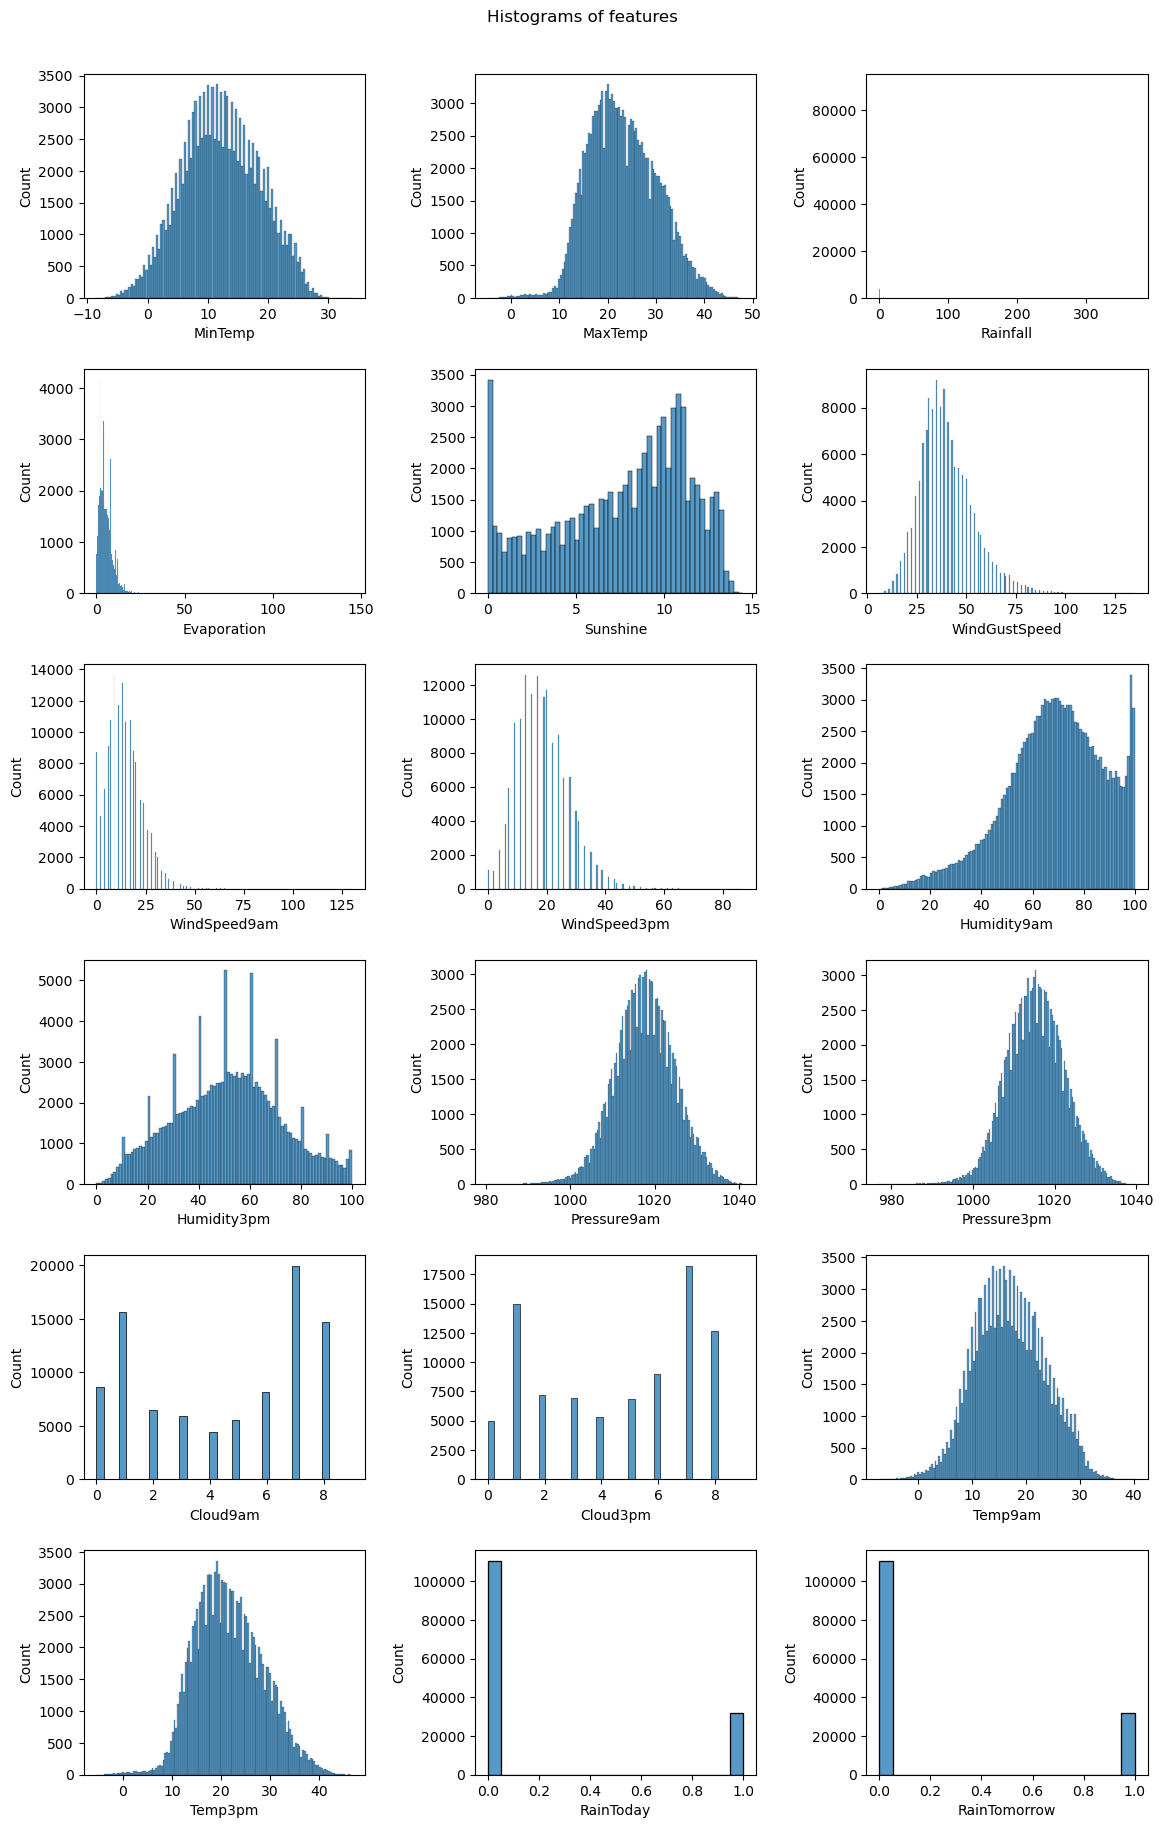

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 18))
axes = axes.flatten()

cont_cols = [col for col in df.columns if df[col].dtype != object]

for i, col in enumerate(cont_cols):
    sns.histplot(df[col], ax=axes[i])

fig.tight_layout(pad=2.0)
plt.suptitle('Histograms of features', y=1.02)
plt.show()

**Observations:**
- Most features are normally distributed as expected
- The `Rainfall` distribution needs further investigation as the large outlier is likely affecting the ability to plot the data
- The `Sunshine` distribution is interesting but largely explainable:
    - The high frequency of 0 values represents days where it is overcast all day
    - The abrupt decline in frequency after around 11 hours is a reflection of the limited number of days of the year where it is light out for that many hours or longer
- The `Humidity9am` distribution is particularly interesting due to the large spike in frequencies near 100%

Since the summary statistics section showed that the 75th percentile for the `Rainfall` feature is only 0.8, the following plot shows the distribution of values betwen 0 and 1.

**Analysis Summary:**

- The majority of features in the dataset exhibit a normal distribution, aligning with expectations.

- A detailed examination is required for the `Rainfall` distribution, as a noticeable outlier might be influencing the overall plot.

- The distribution of `Sunshine` reveals intriguing patterns:
    - The prevalence of 0 values signifies overcast days.
    - A sharp decline in frequency occurs after approximately 11 hours, reflecting the scarcity of days with prolonged daylight.

- The distribution of `Humidity9am` is notable for a substantial peak in frequencies near 100%.

Given that the summary statistics indicate a 75th percentile of only 0.8 for the `Rainfall` feature, a focused plot has been generated to illustrate the distribution of values within the 0 to 1 range. This allows for a more detailed examination of the data within this specific range.

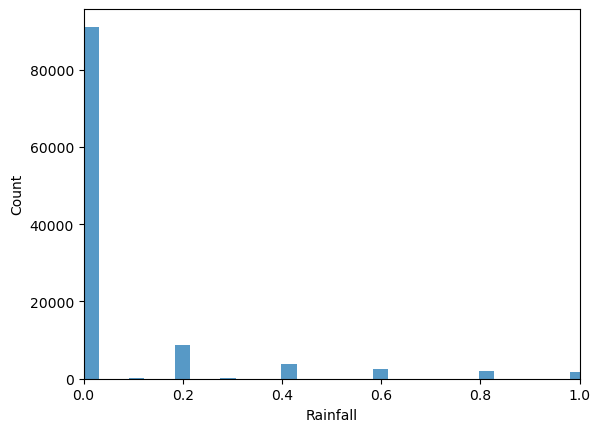

In [15]:
sns.histplot(df.Rainfall)
plt.xlim(0, 1);

### Rainy Days by Location

In [11]:
rain_location = df.groupby(by='Location').sum()
rain_location  = rain_location [['RainToday']]
rain_location.head()

,RainToday
Location,
Adelaide,689.0
Albany,902.0
Albury,617.0
AliceSprings,244.0
BadgerysCreek,583.0


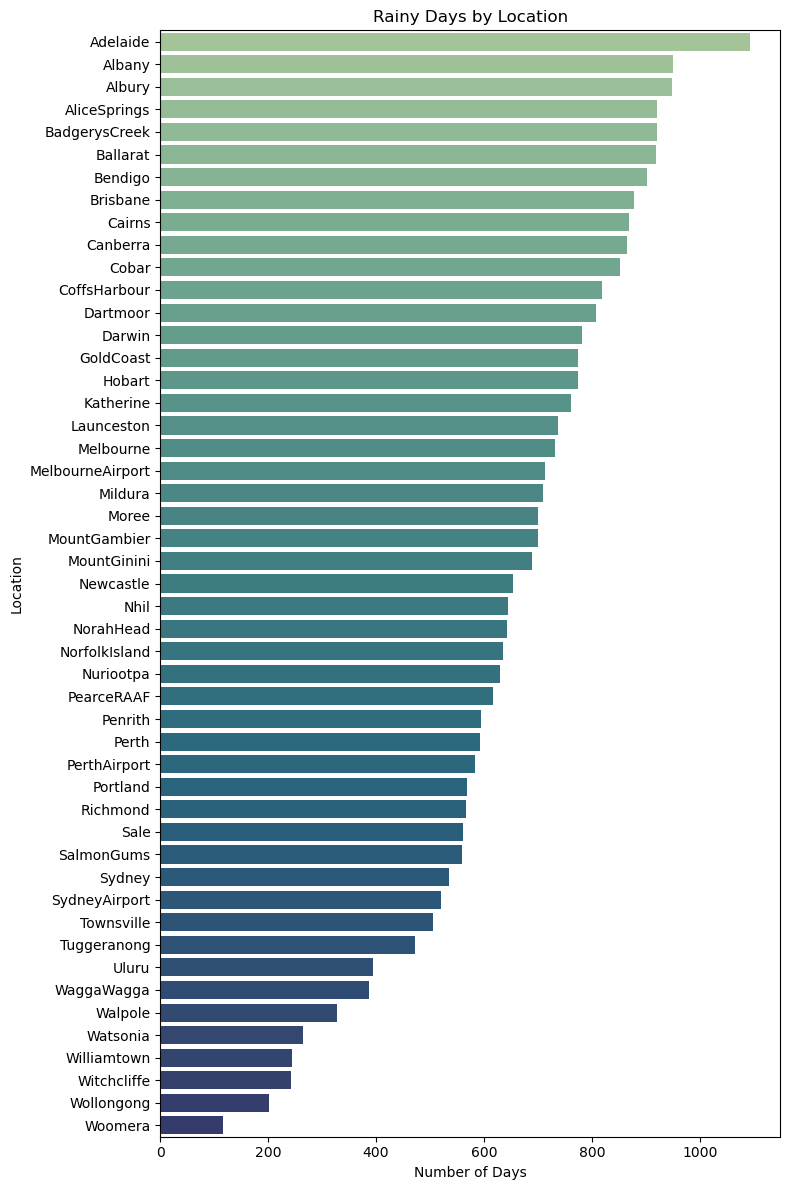

In [17]:
plt.figure(figsize=(8, 12))
sns.barplot(x='RainToday', 
            y=rain_location.index, 
            data=rain_location.sort_values('RainToday', ascending=False), 
            orient='h',
            palette='crest'
           )
plt.xlabel('Number of Days')
plt.title('Rainy Days by Location')
plt.tight_layout()
plt.show()

In [18]:
df.Location.nunique()

49

In [19]:
df.Location.value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


**observations:**

Upon inspecting the value counts for each location, it becomes apparent that data from Katherine, Nhil, and Uluru should be excluded from detailed analysis due to substantial variations in observation counts. The remaining locations exhibit value counts that are sufficiently close, enabling a more accurate and meaningful comparison.

### Seasonality

Rainfall patterns often display seasonality, varying throughout the year. By grouping the data based on the month of the year, it becomes possible to calculate the percentage of days with rainfall for each month.  Analyzing the monthly distribution of rainfall provides insights into the patterns of precipitation, facilitating better understanding for modeling.

In [12]:
seasonality = df.copy()
seasonality['month'] = seasonality.Date.apply(lambda x: int(str(x)[5:7]))
seasonality[['Date', 'month']].head()

,Date,month
0,2008-12-01,12
1,2008-12-02,12
2,2008-12-03,12
3,2008-12-04,12
4,2008-12-05,12


In [13]:
seasonality_grouped = seasonality.groupby('month').mean()
seasonality_grouped[['RainToday']]

,RainToday
month,
1,0.189484
2,0.206746
3,0.217135
4,0.216845
5,0.222163
6,0.263638
7,0.270736
8,0.253167
9,0.229135


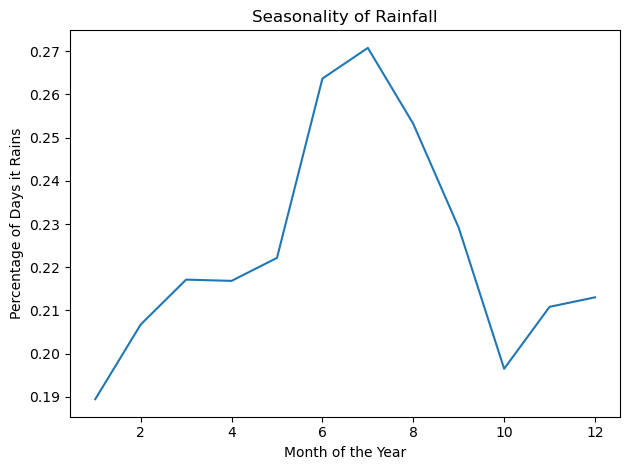

In [14]:
sns.lineplot(data=seasonality_grouped, x=seasonality_grouped.index, y='RainToday')
plt.title('Seasonality of Rainfall')
plt.xlabel('Month of the Year')
plt.ylabel('Percentage of Days it Rains')
plt.tight_layout()
plt.show()

###### This chart shows seasonality in rainfall, it is highest in the month of July

<AxesSubplot:>

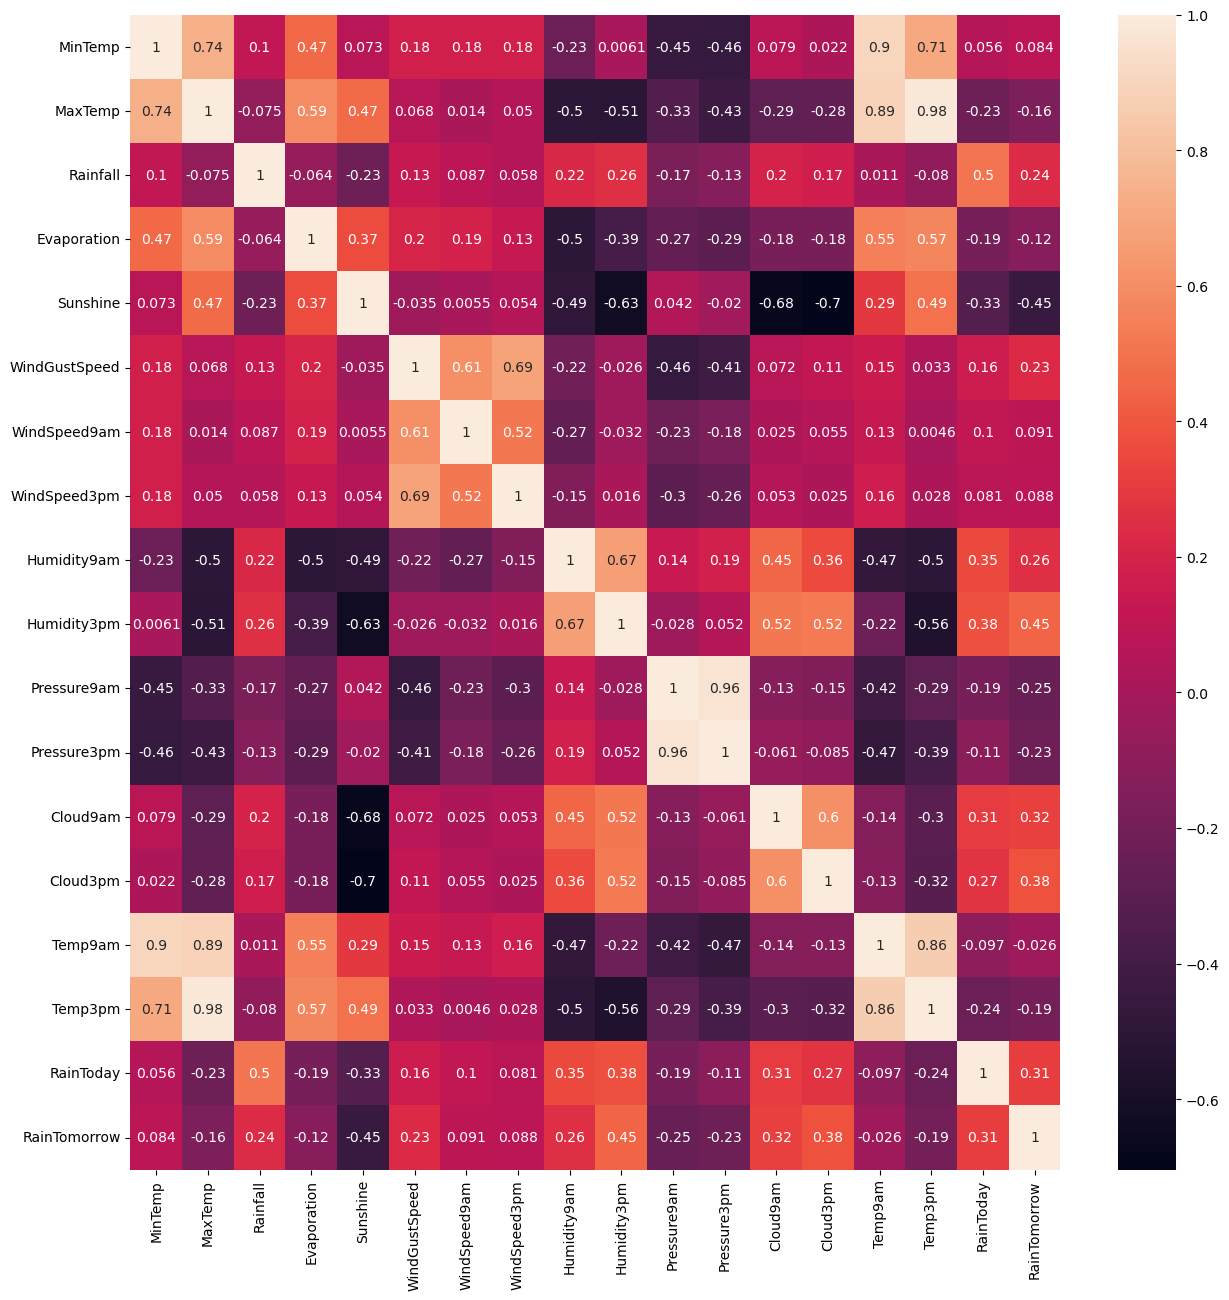

In [23]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)

### missing values 
- we are dealing with missing values using hybrid approach
##### dropping missing values from 'rain tomorrow' the target variable

In [15]:
df_impute = df.dropna(axis=0, subset=['RainTomorrow'])
df_impute.isna().sum() 

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

######  Imputing continuous variables

In [16]:
continous = [col for col in df_impute.columns if df_impute[col].dtype != object]
continous.remove('RainTomorrow')
continous

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [17]:
impute = IterativeImputer(random_state=42)
imputed_cont = impute.fit_transform(df_impute[continous])
imputed_cont = pd.DataFrame(imputed_cont, columns=continous)
imputed_cont.head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,6.497888,7.048211,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.103048,16.9,21.8,0.0
1,7.4,25.1,0.0,6.270412,10.863393,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.912027,2.640581,17.2,24.3,0.0
2,12.9,25.7,0.0,8.659380,11.812408,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.014404,2.000000,21.0,23.2,0.0
3,9.2,28.0,0.0,6.764941,11.542532,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,1.201990,1.993914,18.1,26.5,0.0
4,17.5,32.3,1.0,7.455971,5.520080,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0


In [18]:
imputed_cont.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

###### Imputing categorical variables

In [19]:
categorical = [col for col in df_impute.columns if col not in continous]
categorical.remove('RainTomorrow')
# remove Date and Location since there are no missing values
categorical.remove('Date')
categorical.remove('Location')

categorical

['WindGustDir', 'WindDir9am', 'WindDir3pm']

In [20]:
imputed_categorical = df_impute[categorical].copy()

for col in imputed_categorical.columns:
    values = imputed_categorical[col].value_counts().reset_index()['index'].values
    probs = imputed_categorical[col].value_counts(normalize=True).values
    imputed_categorical[col].replace(np.nan, np.random.choice(a=values, p=probs), inplace=True)

imputed_categorical.head()

,WindGustDir,WindDir9am,WindDir3pm
0,W,W,WNW
1,WNW,NNW,WSW
2,WSW,W,WSW
3,NE,SE,E
4,W,ENE,NW


In [21]:
imputed_categorical.isna().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64

In [22]:
date_locate = df_impute[['Date', 'Location']] #Concatenating
target = df_impute.RainTomorrow

print(date_locate.shape)
print(imputed_cont.shape)
print(imputed_categorical.shape)
print(target.shape)

(142193, 2)
(142193, 17)
(142193, 3)
(142193,)


In [23]:
final_df = pd.concat(objs=[date_locate.reset_index(drop=True), 
                                   imputed_cont.reset_index(drop=True), 
                                   imputed_categorical.reset_index(drop=True), 
                                   target.reset_index(drop=True)
                                  ], 
                             axis=1
                            )
final_df.shape

(142193, 23)

In [20]:
final_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,6.497888,7.048211,44.0,20.0,24.0,...,1007.1,8.000000,5.103048,16.9,21.8,0.0,W,W,WNW,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,6.270412,10.863393,44.0,4.0,22.0,...,1007.8,1.912027,2.640581,17.2,24.3,0.0,WNW,NNW,WSW,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,8.659380,11.812408,46.0,19.0,26.0,...,1008.7,2.014404,2.000000,21.0,23.2,0.0,WSW,W,WSW,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,6.764941,11.542532,24.0,11.0,9.0,...,1012.8,1.201990,1.993914,18.1,26.5,0.0,NE,SE,E,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,7.455971,5.520080,41.0,7.0,20.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,W,ENE,NW,0.0


In [24]:
final_df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainTomorrow     0
dtype: int64

In [25]:
month = final_df.copy() #Extract Month from date and time
month['Month'] = month['Date'].apply(lambda x: int(str(x)[5:7]))
month.drop(columns='Date', inplace=True)
month.head()


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,6.497888,7.048211,44.0,20.0,24.0,71.0,...,8.000000,5.103048,16.9,21.8,0.0,W,W,WNW,0.0,12
1,Albury,7.4,25.1,0.0,6.270412,10.863393,44.0,4.0,22.0,44.0,...,1.912027,2.640581,17.2,24.3,0.0,WNW,NNW,WSW,0.0,12
2,Albury,12.9,25.7,0.0,8.659380,11.812408,46.0,19.0,26.0,38.0,...,2.014404,2.000000,21.0,23.2,0.0,WSW,W,WSW,0.0,12
3,Albury,9.2,28.0,0.0,6.764941,11.542532,24.0,11.0,9.0,45.0,...,1.201990,1.993914,18.1,26.5,0.0,NE,SE,E,0.0,12
4,Albury,17.5,32.3,1.0,7.455971,5.520080,41.0,7.0,20.0,82.0,...,7.000000,8.000000,17.8,29.7,0.0,W,ENE,NW,0.0,12


## Dummy Variables
categorical features needs to be transformed into dummy variables

In [26]:
categor = ['WindGustDir', 'WindDir3pm', 'WindDir9am', 'Month', 'Location']
df_subset = pd.get_dummies(month, columns=categor)
print(df_subset.shape)
df_subset.head()


(142193, 127)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,13.4,22.9,0.6,6.497888,7.048211,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,0,0
1,7.4,25.1,0.0,6.270412,10.863393,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,8.659380,11.812408,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,0
3,9.2,28.0,0.0,6.764941,11.542532,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,7.455971,5.520080,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_subset.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru',
       'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia',
       'Location_Williamtown', 'Location_Witchcliffe', 'Location_Wollongong',
       'Location_Woomera'],
      dtype='object', length=127)

# Modeling
---

### Baseline


In [28]:
final_df = df_subset.copy()
X = final_df.drop(columns='RainTomorrow')
y = final_df.RainTomorrow 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train size:', X_train.shape[0])
print('Test size: ', X_test.shape[0])


Train size: 113754
Test size:  28439


## Logistic Regression


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=42)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
y_pred


array([1., 0., 0., ..., 0., 0., 0.])

Confusion Matrix


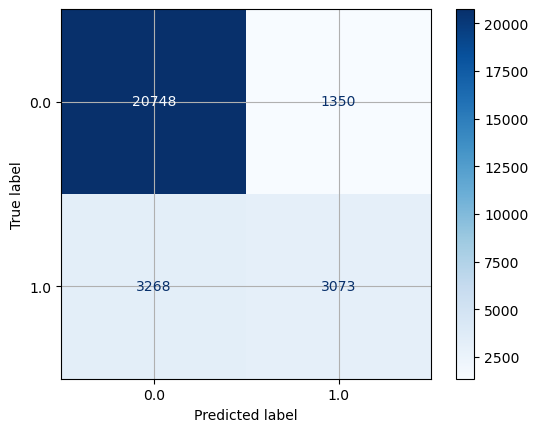

Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     22098
         1.0       0.69      0.48      0.57      6341

    accuracy                           0.84     28439
   macro avg       0.78      0.71      0.74     28439
weighted avg       0.83      0.84      0.83     28439

ROC Curve


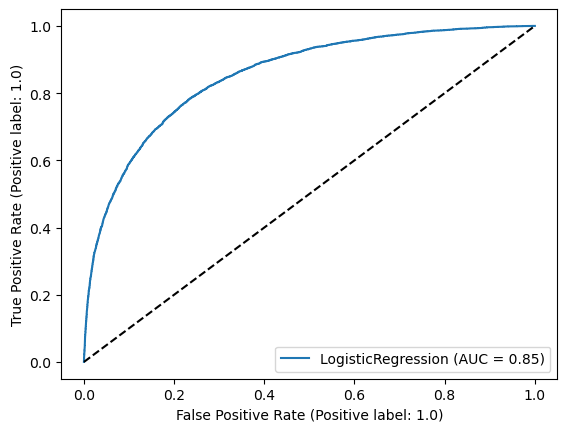

Checking model fitness
Train score: 0.8419
Test score:  0.8376


In [30]:
def conf_matrix(model, X_test, y_test, cmap='Blues'):
    plot_confusion_matrix(model, X_test, y_test, cmap=cmap)
    plt.grid()
    plt.show()

def roc_curve_custom(model, X_test, y_test):
    plot_roc_curve(model, X_test, y_test)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.show()
    
def evaluate(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, y_pred=y_pred):
    # Confusion Matrix
    print('Confusion Matrix')
    conf_matrix(model, X_test, y_test)
    
    # Classification Report
    print('Classification Report') 
    print(classification_report(y_test, y_pred))
    
    # ROC Curve
    print('ROC Curve')
    roc_curve_custom(model, X_test, y_test)
    
    # Checking model fitness
    print('Checking model fitness') 
    print('Train score:', round(model.score(X_train, y_train), 4))
    print('Test score: ', round(model.score(X_test, y_test), 4))
    
evaluate(LR)


#### Findings:

    The baseline model demonstrates satisfactory performance.
    Notably, the weakest aspect lies in recall, especially on days when rain is predicted for the following day.
    The model exhibits a good fit, as evidenced by similar scores for both the training and testing datasets.

### Hyper parameter tuning LR
here we are using a range of C's to explore different level of regularization
covering a broad range of possibilities from strong regularization (small C) to weak regularization (large C).


In [31]:
LR_params = {
    'C': [1e-4, 1e-2, 1, 1e2, 1e4],
    'fit_intercept': [True, False],
    'max_iter': [50, 100, 150],
    'random_state': [42]
}

LR_CV = GridSearchCV(LR, LR_params, scoring='accuracy', cv=5)
LR_CV.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.0001, 0.01, 1, 100.0, 10000.0],
                         'fit_intercept': [True, False],
                         'max_iter': [50, 100, 150], 'random_state': [42]},
             scoring='accuracy')

In [32]:
LR_CV.best_params_

{'C': 10000.0, 'fit_intercept': True, 'max_iter': 150, 'random_state': 42}

In [33]:
round(LR_CV.best_score_, 2)

0.84

In [34]:
y_pred_LR_CV = LR_CV.predict(X_test)
y_pred_LR_CV

array([1., 0., 0., ..., 0., 0., 0.])

Confusion Matrix


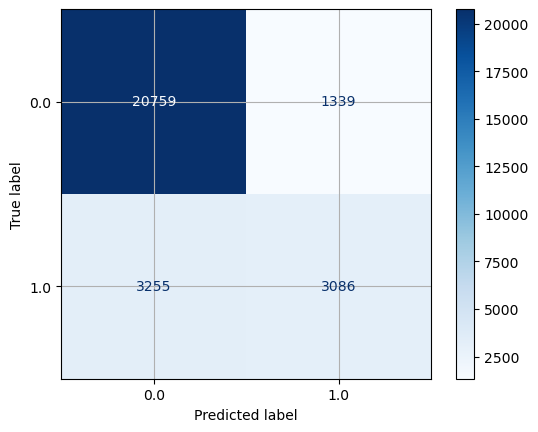

Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     22098
         1.0       0.70      0.49      0.57      6341

    accuracy                           0.84     28439
   macro avg       0.78      0.71      0.74     28439
weighted avg       0.83      0.84      0.83     28439

ROC Curve


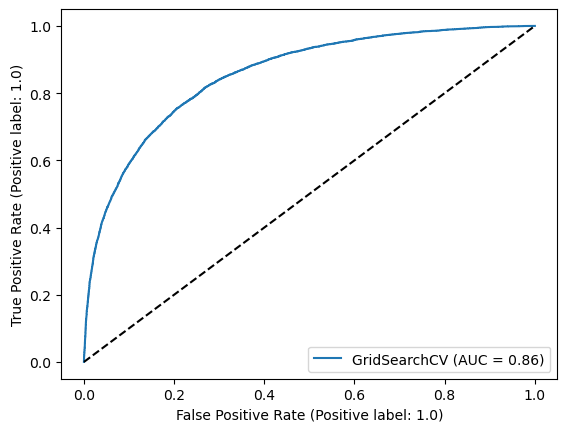

Checking model fitness
Train score: 0.843
Test score:  0.8385


In [35]:
evaluate(LR_CV, y_pred=y_pred_LR_CV)

**Findings:**
- Precision score improved
- Model fitness, is same as the baseline logreg model

### Decision Tree


In [36]:
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)
y_predict_tree = DT.predict(X_test)
y_predict_tree


array([1., 1., 0., ..., 0., 0., 0.])

Confusion Matrix


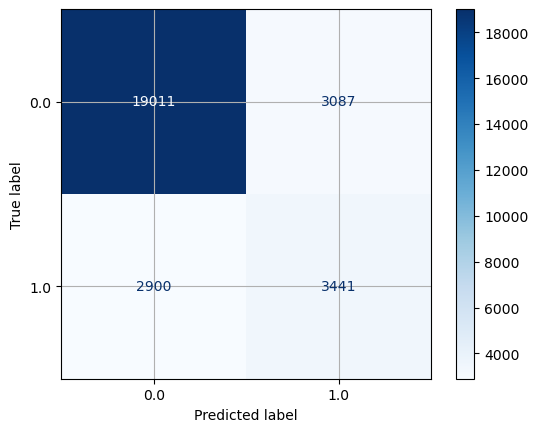

Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86     22098
         1.0       0.53      0.54      0.53      6341

    accuracy                           0.79     28439
   macro avg       0.70      0.70      0.70     28439
weighted avg       0.79      0.79      0.79     28439

ROC Curve


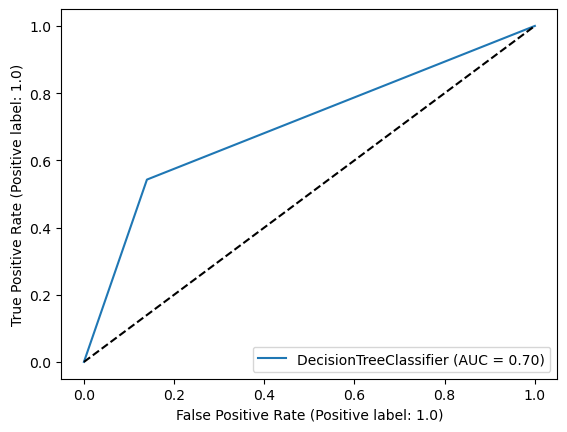

Checking model fitness
Train score: 1.0
Test score:  0.7895


In [37]:
evaluate(DT, y_pred=y_predict_tree)

**Findings::**
- Accuracy falls short compared to the logistic regression model.
- Overfitting is apparent, as indicated by a significantly higher score for the training data compared to the testing data.

### Hyper parameter tuning for DT

In [38]:
DT_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'random_state': [42]
}

DT_CV = GridSearchCV(DT, param_grid=DT_params, scoring='accuracy', cv=5)
DT_CV.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [42]},
             scoring='accuracy')

In [39]:
DT_CV.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'random_state': 42}

In [40]:
round(DT_CV.best_score_, 2)

0.84

In [41]:
y_pred_DT_CV = DT_CV.best_estimator_.predict(X_test)
y_pred_DT_CV

array([1., 0., 0., ..., 0., 0., 0.])

Confusion Matrix


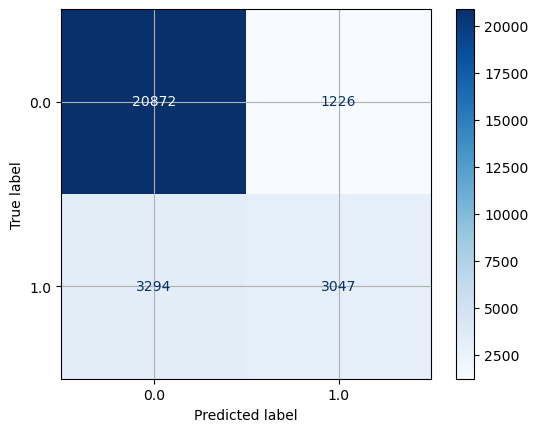

Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     22098
         1.0       0.71      0.48      0.57      6341

    accuracy                           0.84     28439
   macro avg       0.79      0.71      0.74     28439
weighted avg       0.83      0.84      0.83     28439

ROC Curve


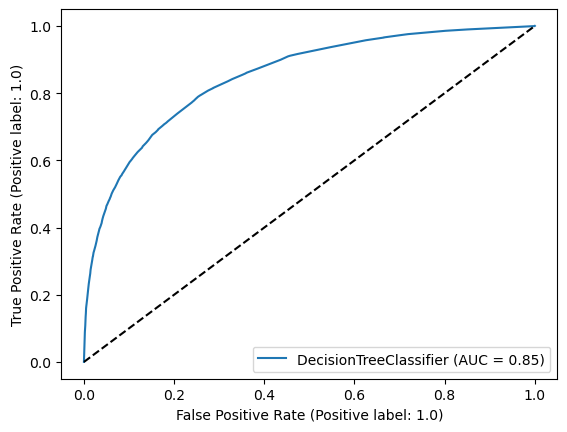

Checking model fitness
Train score: 0.8484
Test score:  0.8411


In [42]:
evaluate(DT_CV.best_estimator_, y_pred=y_pred_DT_CV)

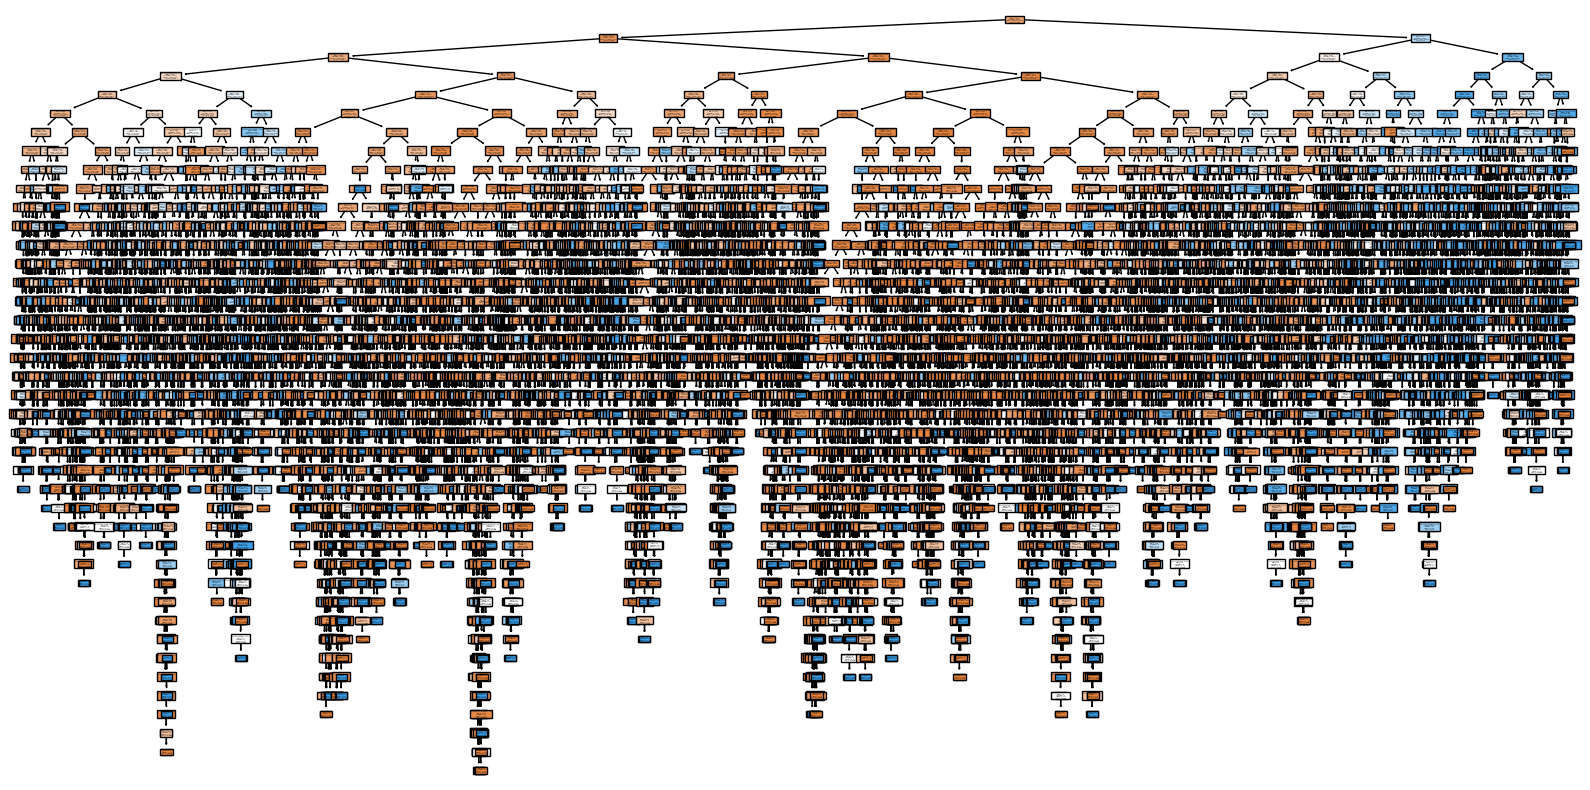

In [74]:
#from sklearn.tree import plot_tree
#plt.figure(figsize=(20, 10))
#plot_tree(DT, filled=True, feature_names=X.columns, class_names=['No Rain', 'Rain'])
#plt.show()

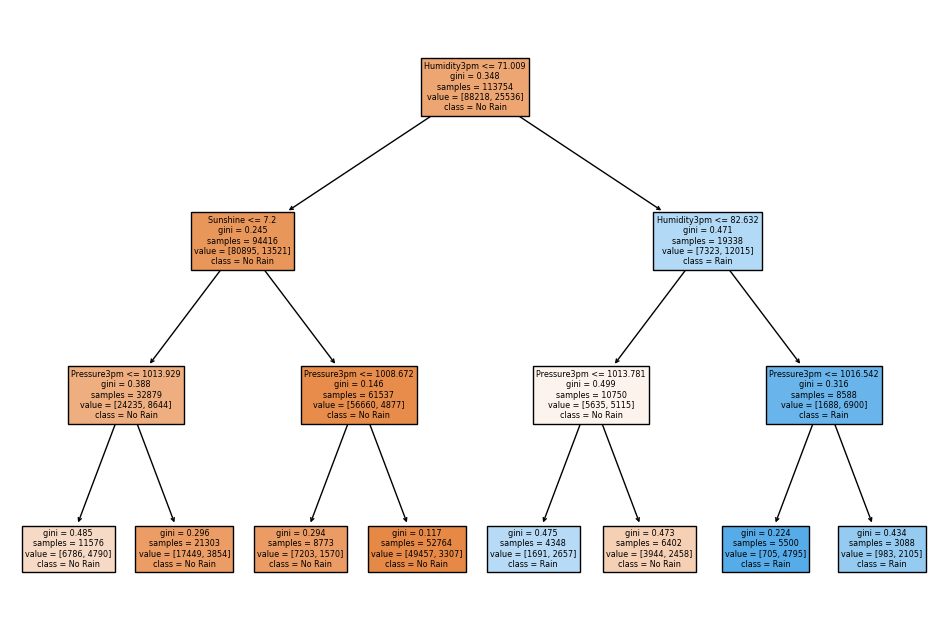

In [76]:
#threshold = 0.05
#important_features = X.columns[DT.feature_importances_ > threshold]
#DT_p = DecisionTreeClassifier(max_depth=3, random_state=42)
#DT_P.fit(X_train[important_features], y_train)

#plt.figure(figsize=(12, 8))
#plot_tree(DT, filled=True, feature_names=important_features, class_names=['No Rain', 'Rain'])
#plt.show()

In [43]:
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)
y_pred_rf = RF.predict(X_test)
y_pred_rf

array([1., 0., 0., ..., 0., 0., 0.])

Confusion Matrix


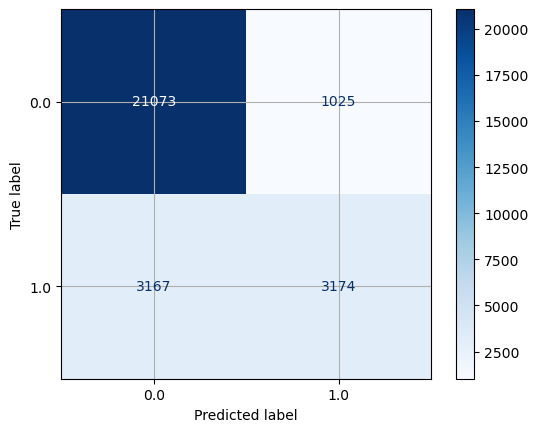

Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     22098
         1.0       0.76      0.50      0.60      6341

    accuracy                           0.85     28439
   macro avg       0.81      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439

ROC Curve


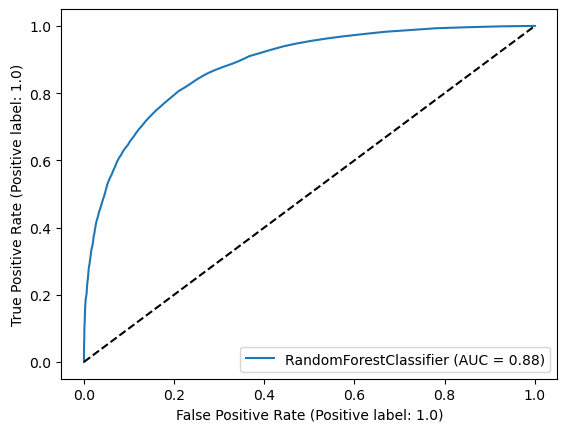

Checking model fitness
Train score: 0.9999
Test score:  0.8526


In [44]:
evaluate(RF, y_pred=y_pred_rf)

**Findings:**
- precision and recall improved
- tuned model fits better than the baseline DT model 

In [ ]:
#RF_params = {
   ## 'max_depth': [3, 7, 11],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 3, 5],
    'random_state': [42]
#}

#RF_CV = GridSearchCV(RF, param_grid=RF_params, scoring='accuracy', cv=5)
#RF_CV.fit(X_train, y_train)

#RF_CV.best_params_



In [ ]:
#round(RF_CV.best_score_, 2)

In [ ]:
#y_pred_RF_CV = RF_CV.predict(X_test)
#y_pred_RF_CV

In [ ]:
#evaluate(RF_CV, y_pred=y_pred_RF_CV)

### Naive_Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

# We define the model
NB = GaussianNB()

# We train model
NB.fit(X_train, y_train)

# We predict target values
y_predict_NB = NB.predict(X_test)

Confusion Matrix


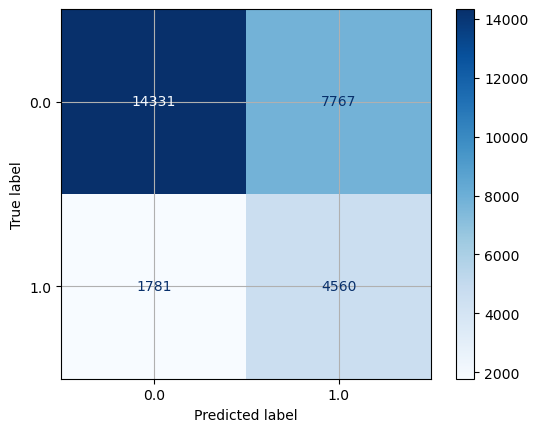

Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.65      0.75     22098
         1.0       0.37      0.72      0.49      6341

    accuracy                           0.66     28439
   macro avg       0.63      0.68      0.62     28439
weighted avg       0.77      0.66      0.69     28439

ROC Curve


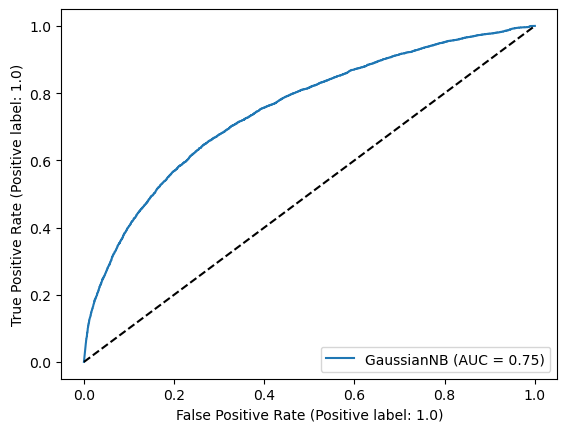

Checking model fitness
Train score: 0.6694
Test score:  0.6643


In [46]:
evaluate(NB, y_pred=y_predict_NB)

### Naive Bayes with Random Forest

In [47]:
#combining naive bayes with random forest

# Get probability predictions for both models
proba_rf = RF.predict_proba(X_test)
proba_nb = NB.predict_proba(X_test)

In [48]:
# Combine predictions by averaging probabilities
y_pred_combined_proba = (proba_rf + proba_nb) / 2.0

In [49]:
# Convert averaged probabilities to class labels using a threshold
threshold = 0.5  # You can adjust this threshold based on your preference
y_pred_combined = (y_pred_combined_proba[:, 1] > threshold).astype(int)


In [33]:
# Evaluate the confusion matrix
#from sklearn.metrics import confusion_matrix, f1_score
#conf_matrix_combined = confusion_matrix(y_test, y_pred_combined)
#print("Confusion Matrix for Combined Model:")
#print(conf_matrix_combined)

Confusion Matrix for Combined Model:
[[15530  6568]
 [ 1839  4502]]


In [50]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Create the stacking classifier
base_models = [('rf', RF), ('nb', NB)]
meta_model = LogisticRegression()
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions with the stacking model
y_pred_stacked = stacking_model.predict(X_test)

# Evaluate the stacking model using your evaluation functions
def conf_matrix(model, X_test, y_test, cmap='Blues'):
    plot_confusion_matrix(model, X_test, y_test, cmap=cmap)
    plt.grid()
    plt.show()

Confusion Matrix


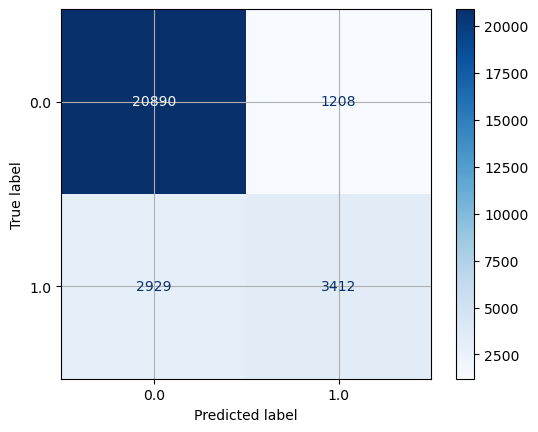

Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     22098
         1.0       0.74      0.54      0.62      6341

    accuracy                           0.85     28439
   macro avg       0.81      0.74      0.77     28439
weighted avg       0.85      0.85      0.85     28439

ROC Curve


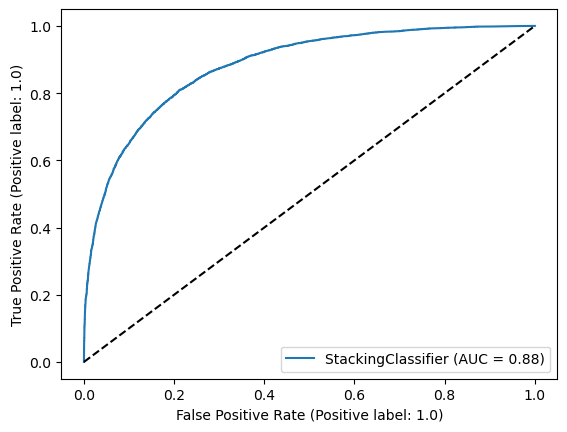

Checking model fitness
Train score: 1.0
Test score:  0.8545


In [51]:
def roc_curve_custom(model, X_test, y_test):
    plot_roc_curve(model, X_test, y_test)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.show()

def evaluate(model, X_train, X_test, y_train, y_test, y_pred):
    # Confusion Matrix
    print('Confusion Matrix')
    conf_matrix(model, X_test, y_test)
    
    # Classification Report
    print('Classification Report') 
    print(classification_report(y_test, y_pred))
    
    # ROC Curve
    print('ROC Curve')
    roc_curve_custom(model, X_test, y_test)
    
    # Checking model fitness
    print('Checking model fitness') 
    print('Train score:', round(model.score(X_train, y_train), 4))
    print('Test score: ', round(model.score(X_test, y_test), 4))

# Use your evaluate function for the stacking model
evaluate(stacking_model, X_train, X_test, y_train, y_test, y_pred_stacked)

**Findings:**
- NAive bayes Low performance compared to LR and DT

### KNN


In [74]:
from sklearn.neighbors import KNeighborsClassifier

# We define the model
#KNN = KNeighborsClassifier(n_neighbors=15,n_jobs=-1)

# We train model
#KNN.fit(X_train, y_train)

# We predict target values
#Y_predict_KNN = KNN.predict(X_test)

In [75]:
#evaluate(KNN, y_pred=Y_predict_KNN)


#### Hyper parameter tuning KNN


In [68]:
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import GridSearchCV

# Define the KNN model
#KNN = KNeighborsClassifier()

# Define the hyperparameter grid
#KNN_params = {
    #'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    #'weights': ['uniform', 'distance'],  # Weight function used in prediction
   # 'p': [1, 2]  # Power parameter for the Minkowski distance
#}

# Create a GridSearchCV object
#KNN_CV = GridSearchCV(KNN, param_grid=KNN_params, scoring='accuracy', cv=5)

# Fit the model to the training data
#KNN_CV.fit(X_train, y_train)

# Get the best hyperparameters
#best_params = KNN_CV.best_params_
#print("Best Hyperparameters:", best_params)

# Predict using the best model
#Y_predict_KNN_best = KNN_CV.predict(X_test)


In [51]:
#KNN_CV.best_params_

{'n_neighbors': 1}

In [52]:
#round(KNN_CV.best_score_, 2)

0.8

In [53]:
#y_pred_KNN_CV = KNN_CV.best_estimator_.predict(X_test)
#y_pred_KNN_CV

array([1., 0., 0., ..., 1., 0., 0.])

#### Model comparison

In [62]:
models = [LR_CV,DT_CV,KNN_CV]


#### Feature Importance

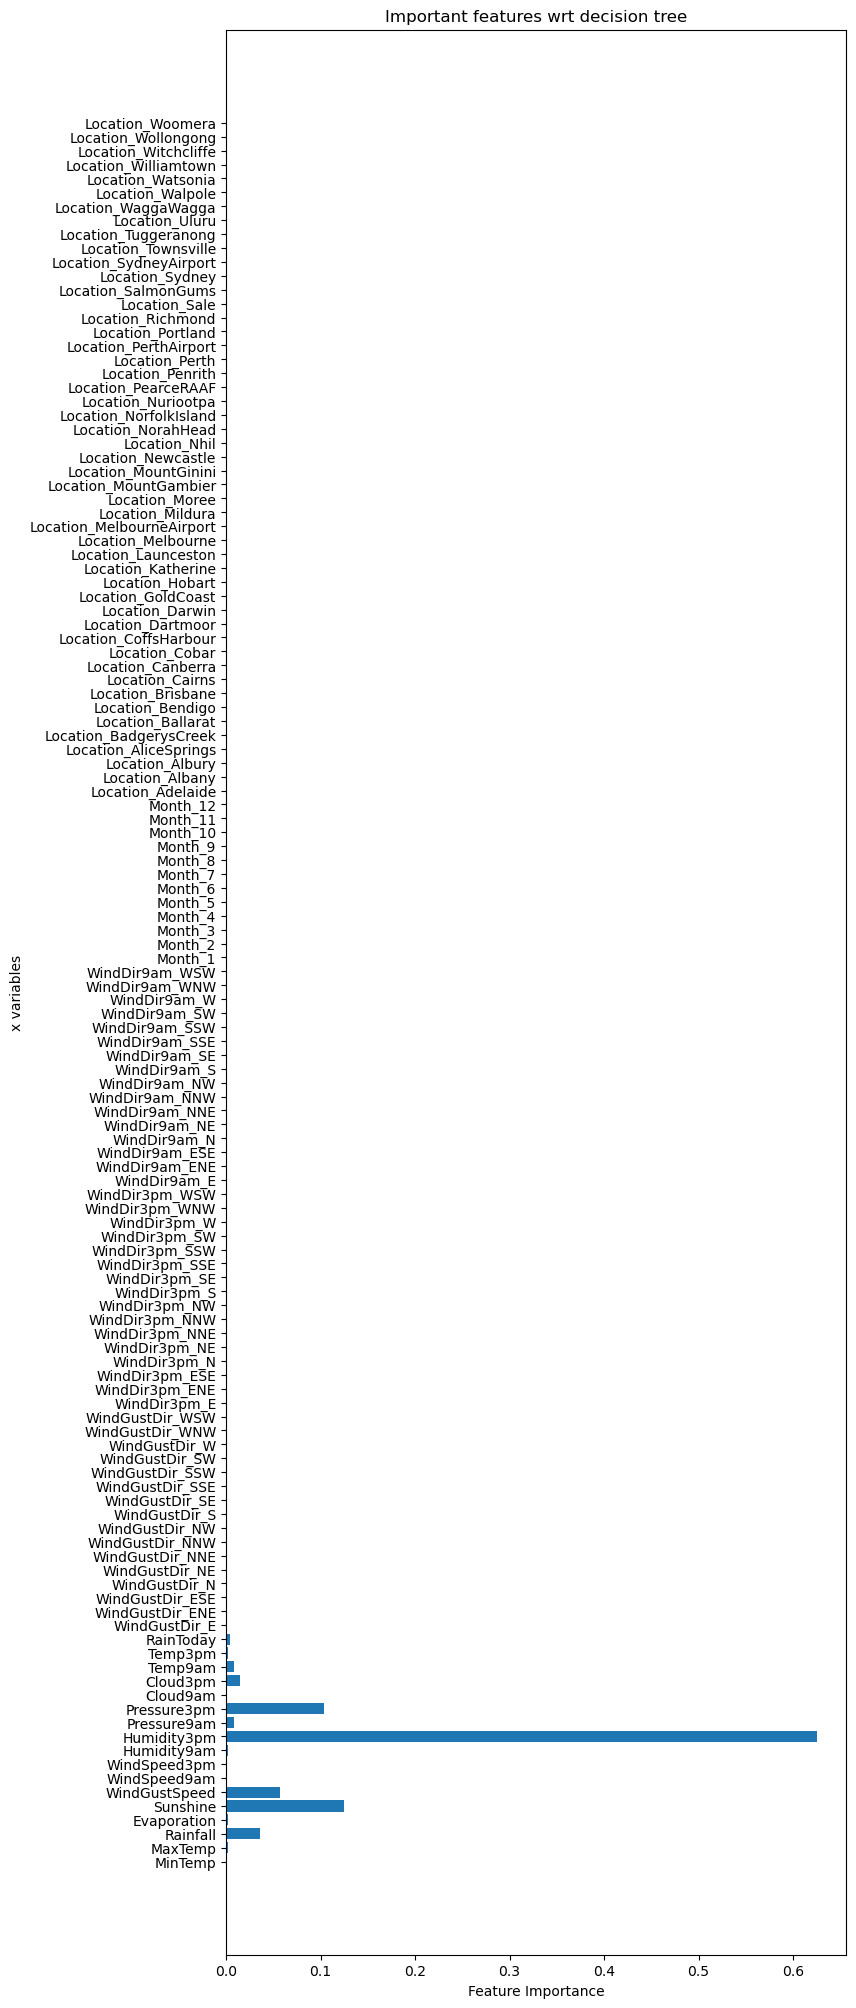

In [65]:
best_dt = DT_CV.best_estimator_

plt.figure(figsize=(8, 25))
plt.barh(range(best_dt.n_features_in_), best_dt.feature_importances_)
plt.yticks(np.arange(best_dt.n_features_in_), X_train.columns.values)
plt.xlabel('Feature Importance')
plt.ylabel('x variables')
plt.title('Important features wrt decision tree');


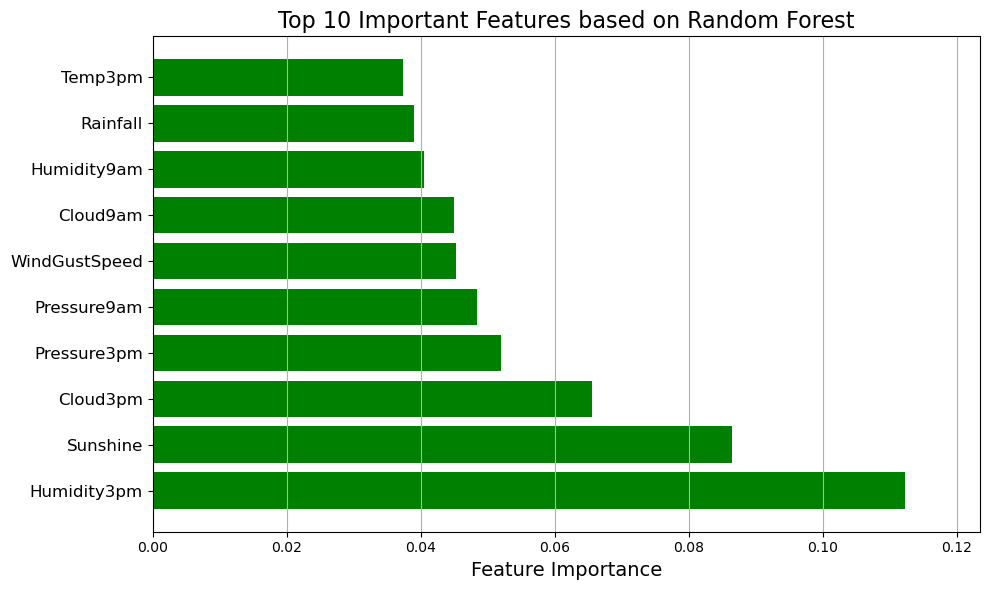

In [65]:
import matplotlib.pyplot as plt

feat_importances = RF.feature_importances_
important_indices = np.argsort(feat_importances)[::-1][:10]
important_features = [X.columns[i] for i in important_indices]

plt.figure(figsize=(10,6))

plt.barh(range(len(important_features)), 
         feat_importances[important_indices], 
         height=0.8,
         color="g")

plt.yticks(range(len(important_features)), 
        important_features, 
        fontsize=12)

plt.xlim(0, max(feat_importances[important_indices]) * 1.1)

plt.title("Top 10 Important Features based on Random Forest", fontsize=16)
plt.xlabel("Feature Importance", fontsize=14)

plt.grid(axis='x', linestyle='-')

plt.tight_layout()
plt.show()

### Findings
Humidity3pm, Sunshine, Pressure3pm, WindGustSpeed, Rainfall are the top 5 important features 

In [54]:
from sklearn.metrics import f1_score


In [58]:
f1_lr = f1_score(y_test, y_pred)
f1_lr_cv = f1_score(y_test, y_pred_LR_CV)
f1_dt = f1_score(y_test, y_predict_tree)
f1_dt_cv = f1_score(y_test, y_pred_DT_CV)
f1_nb = f1_score(y_test, y_predict_NB)
f1_knn = f1_score(y_test, Y_predict_KNN)
f1_nb_with_rf =f1_score(y_test, y_pred_stacked)
f1_rf = f1_score(y_test, y_pred_rf)


In [66]:
print("F1 Score for Logistic Regression:", f1_lr)
print("F1 Score for Logistic Regression (CV):", f1_lr_cv)
print("F1 Score for Decision Tree:", f1_dt)
print("F1 Score for Decision Tree (CV):", f1_dt_cv)
print("F1 Score for Naive Bayes:", f1_nb)
print("F1 Score for K-Nearest Neighbors (KNN):", f1_knn)
print("F1 Score for Naive Bayes with Random Forest (Stacked):", f1_nb_with_rf)
print("F1 Score for Random Forest:", f1_rf)

F1 Score for Logistic Regression: 0.570977331846897
F1 Score for Logistic Regression (CV): 0.5732862715957644
F1 Score for Decision Tree: 0.5347734866734011
F1 Score for Decision Tree (CV): 0.5741473525532316
F1 Score for Naive Bayes: 0.4885365331047783
F1 Score for K-Nearest Neighbors (KNN): 0.5853841115373818
F1 Score for Naive Bayes with Random Forest (Stacked): 0.6225709333090046
F1 Score for Random Forest: 0.6022770398481974


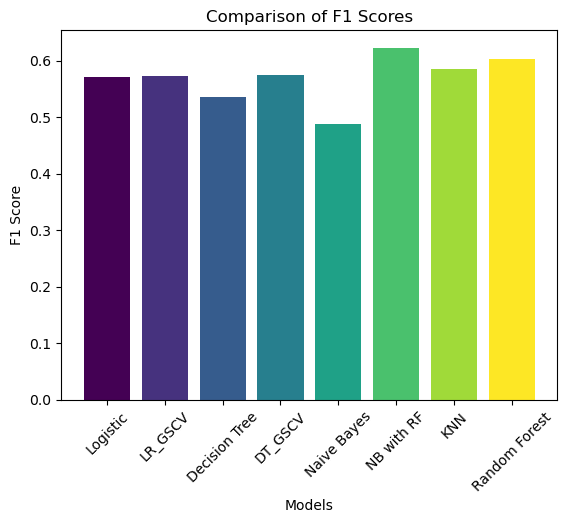

In [63]:
models = ['Logistic', 'LR_GSCV', 'Decision Tree', 'DT_GSCV', 'Naive Bayes', 'NB with RF', 'KNN', 'Random Forest']
f1_scores = [f1_lr, f1_lr_cv, f1_dt, f1_dt_cv, f1_nb, f1_nb_with_rf, f1_knn,  f1_rf]
colors = plt.cm.viridis(np.linspace(0, 1, len(f1_scores)))
bars = plt.bar(models, f1_scores, color=colors)
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()

In [61]:
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
models =[LR_CV,DT_CV,RF,stacking_model,KNN]


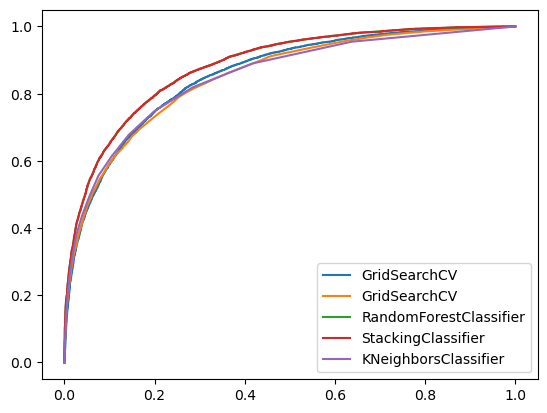

In [62]:
for i, model in enumerate(models):

  probs = model.predict_proba(X_test)  
  fpr, tpr, _ = roc_curve(y_test, probs[:,1])   

  model_name = model.__class__.__name__  
  plt.plot(fpr, tpr, label=model_name)

plt.legend() 